In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("fraud_detection.csv")

In [3]:
df.head()

transaction_amount  transaction_risk_score  is_fraud
0            1.879910               -1.485035         0
1            0.377083               -2.238585         0
2            1.354312               -2.664638         0
3           -0.509843               -1.502950         0
4            0.863561               -1.906364         0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      10000 non-null  float64
 1   transaction_risk_score  10000 non-null  float64
 2   is_fraud                10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [5]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [6]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

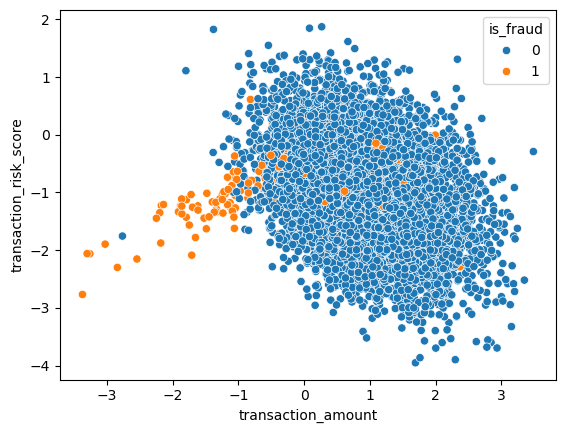

In [7]:
sns.scatterplot(x=X["transaction_amount"],y=X["transaction_risk_score"],hue=y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [10]:
#hyperparameter tuning with class weights to handle imbalance
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [11]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [13]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [18]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [19]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [20]:
y_pred=grid.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2481
           1       0.42      0.84      0.56        19

    accuracy                           0.99      2500
   macro avg       0.71      0.92      0.78      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix: 
  [[2459   22]
 [   3   16]]


In [25]:

model_prob=grid.predict_proba(X_test)

In [26]:
model_prob

array([[0.99586436, 0.00413564],
       [0.85287009, 0.14712991],
       [0.952308  , 0.047692  ],
       ...,
       [0.98898975, 0.01101025],
       [0.98454137, 0.01545863],
       [0.99758734, 0.00241266]])

In [27]:
model_prob=model_prob[:,1]

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
model_auc=roc_auc_score(y_test,model_prob)

In [30]:
model_auc

np.float64(0.7392898371029116)

In [31]:
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [32]:
thresholds

array([           inf, 9.30437623e-01, 5.77439071e-01, 5.43503126e-01,
       5.36071177e-01, 3.13930014e-01, 3.13113053e-01, 2.63811756e-01,
       2.62153759e-01, 1.82293113e-01, 1.81413613e-01, 1.81238368e-01,
       1.81099479e-01, 1.40639443e-01, 1.40466934e-01, 8.37807931e-02,
       8.36475387e-02, 6.24145598e-02, 6.23568050e-02, 5.87450606e-02,
       5.85760393e-02, 4.66734882e-02, 4.66388457e-02, 4.44079179e-02,
       4.44070020e-02, 3.15450104e-02, 3.14979943e-02, 2.58175962e-02,
       2.57789181e-02, 2.53613709e-02, 2.53519752e-02, 2.37938921e-02,
       2.37805419e-02, 1.76180426e-02, 1.75917346e-02, 1.49644153e-02,
       1.49487085e-02, 1.34565240e-02, 1.34207005e-02, 1.10633422e-02,
       1.10295711e-02, 1.02139146e-02, 1.01950346e-02, 9.12485849e-03,
       9.07466070e-03, 8.79584638e-03, 8.78353810e-03, 7.86815504e-03,
       7.85740346e-03, 5.67174629e-04])

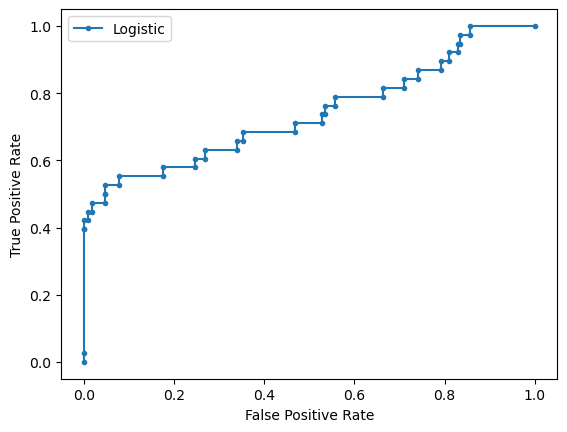

In [33]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

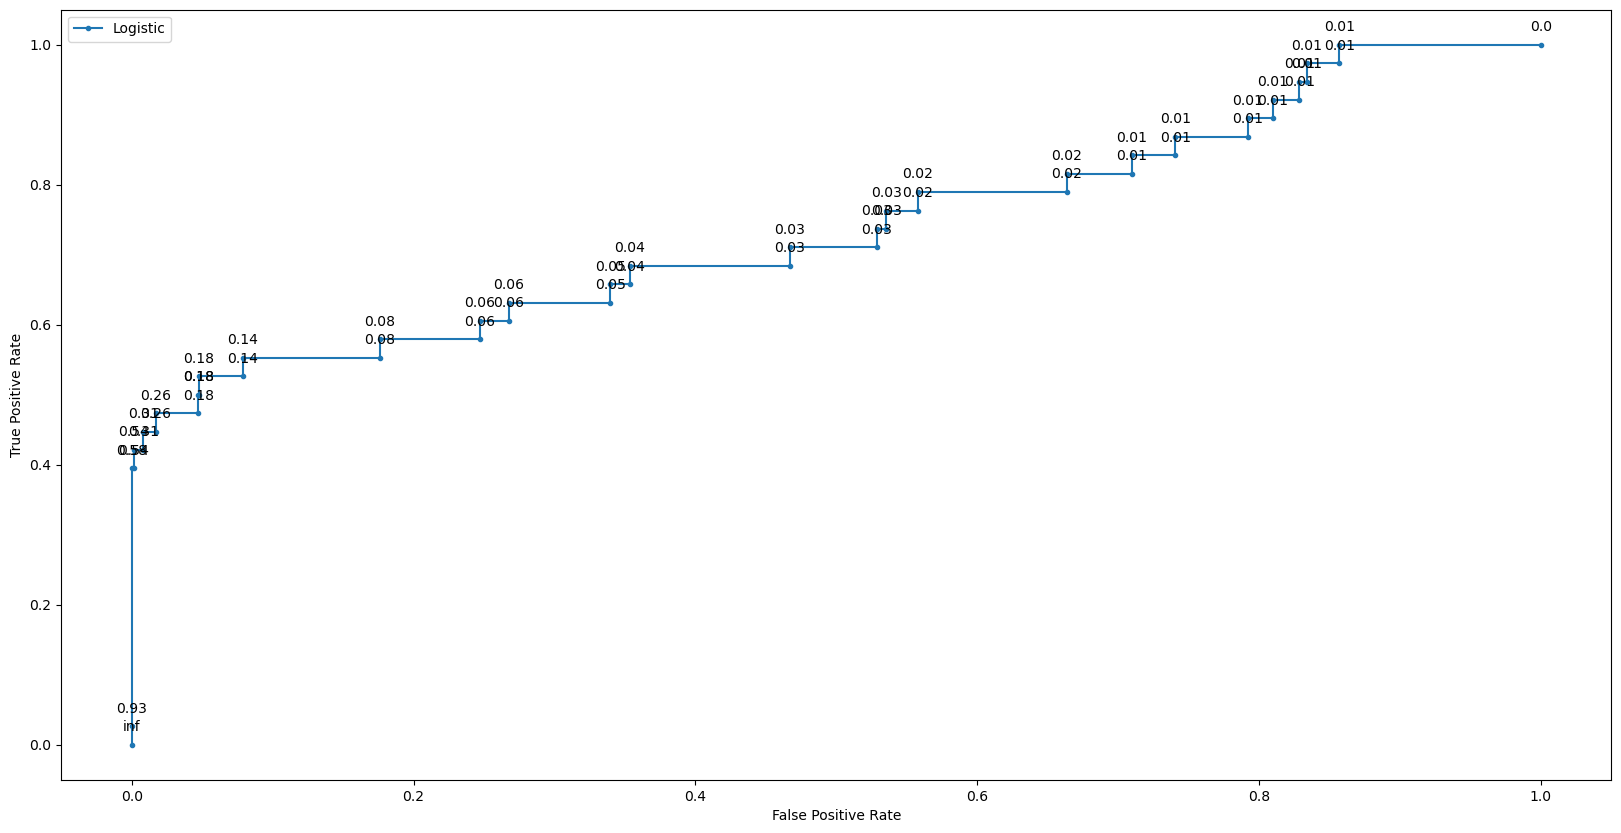

In [34]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [37]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.5  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_custom), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Subscribed'])

plt.xlabel('Predicted')  
plt.ylabel('Actual')     
plt.title('Confusion Matrix')
plt.show()

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.5
[[2459    3]
 [  22   16]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2462
           1       0.84      0.42      0.56        38

    accuracy                           0.99      2500
   macro avg       0.92      0.71      0.78      2500
weighted avg       0.99      0.99      0.99      2500



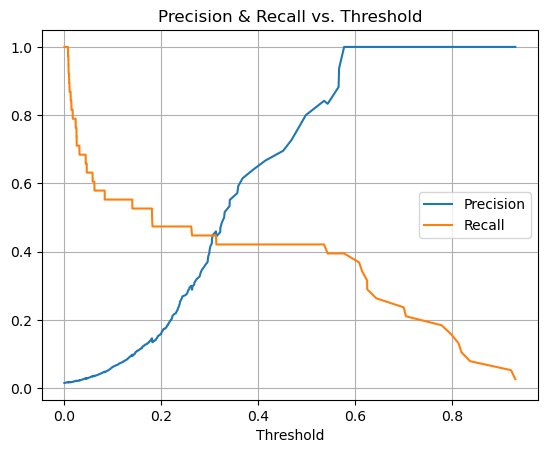

In [36]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()